In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from derivative import dxdt

In [2]:
import sys
sys.path.append('../PyDynamics/sindy_files/')
import sindy

In [3]:
import sys
sys.path.append('../PyDynamics/dmd_files/')
import edmd

In [4]:
import rossler_sindy_utils as rsindy   
import rossler_utils_edmd as redmd

In [5]:
a = 0.2
b = 0.2
c = 5.7

In [21]:
T0 = 0.001
DT = 0.001
T = 100
P_order = 2
threshold = 0.025

In [22]:
rossler_params =[a,b,c]

In [23]:
u0 = np.array([1,1,1])

In [262]:
Eta = 0.005

In [25]:
sim_time,sim_data,Coeff = rsindy.rossler_system_with_noise_gen(Eta,u0,T0,T,DT,P_order,threshold,rossler_params)
sindy_sim_time,sindy_model_data=rsindy.sindy_rossler_trajectory(u0,Coeff,P_order,T0,T,DT)

In [26]:
tn,Un,UPn = redmd.generate_noisy_data(Eta,u0,T0,T,DT,rossler_params)
ThetaRn, ThetaRdn = edmd.trial_function_eval(np.transpose(Un), np.transpose(UPn))
An=edmd.findA(ThetaRn, ThetaRdn)

In [27]:
edmd_time, edmd_data = redmd.edmd_rossler_trajectory(u0,An[0:3],T0,T,DT)

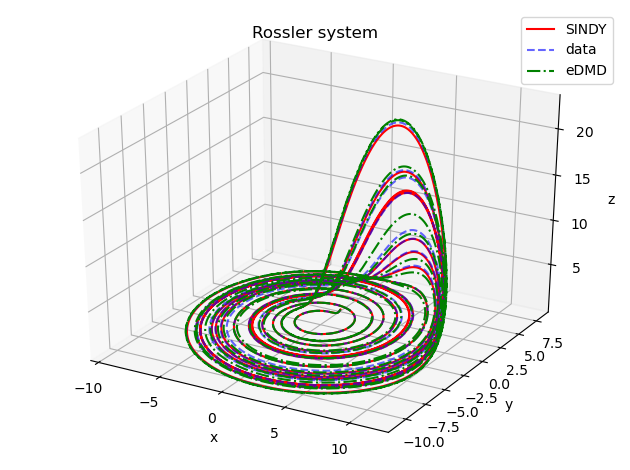

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sindy_model_data[:,0],sindy_model_data[:,1],sindy_model_data[:,2],color="red",label="SINDY")
ax.plot3D(sim_data.T[0],sim_data.T[1],sim_data.T[2],"--",color="blue",alpha=0.6,label="data")
ax.plot3D(edmd_data.T[0],edmd_data.T[1],edmd_data.T[2],"-.",color="green",label="eDMD")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Rossler system")
ax.legend()
plt.tight_layout()
plt.savefig("Figures/Rossler_Data_vs_SINDY_v_edmd_3d.pdf")

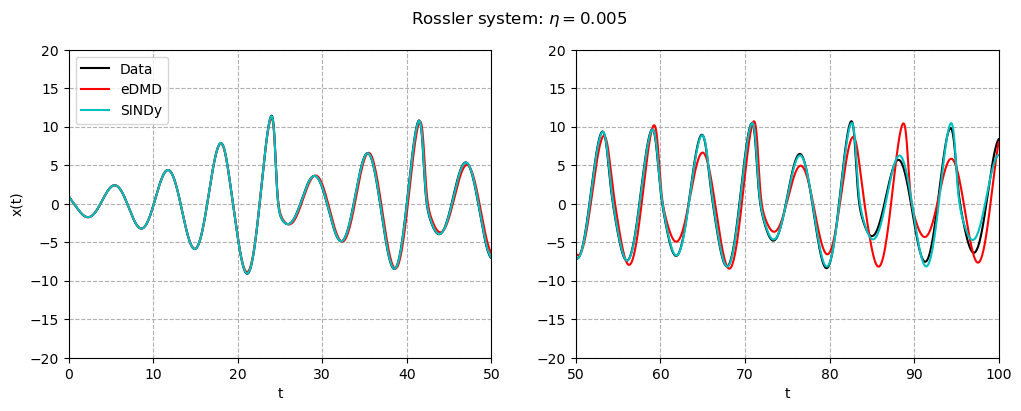

In [263]:
fig,ax = plt.subplots(1,2,figsize=[12,4])
ax[0].plot(sim_time,sim_data.T[0],"k-",label="Data")
ax[0].plot(edmd_time,edmd_data.T[0],"r-",label="eDMD")
ax[0].plot(sindy_sim_time,sindy_model_data.T[0],"c-",label="SINDy")
ax[0].set_xlim(0,50)

ax[1].plot(sim_time,sim_data.T[0],"k-",label="Data")
ax[1].plot(edmd_time,edmd_data.T[0],"r-",label="eDMD")
ax[1].plot(sindy_sim_time,sindy_model_data.T[0],"c-",label="SINDy")
ax[1].set_xlim(50,100)

ax[0].legend()
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("x(t)")
ax[1].grid(True, linestyle='--')
ax[0].grid(True, linestyle='--')
ax[0].set_ylim(-20,20)
ax[1].set_ylim(-20,20)
fig.suptitle("Rossler system: $\eta = %2.3f$"%(Eta))
plt.savefig("Figures/Rossler_noise_time_series.pdf")

In [15]:
from sklearn.metrics import mean_squared_error

In [283]:
Eta = [0.0001,0.001,0.1]

In [284]:
N_sample = [500,5000,10000,15000,20000,22000,25000,27000,30000]

In [285]:
Eta

[0.0001, 0.001, 0.1]

In [286]:
rms_eta_sindy = []
rms_eta_edmd = []

for e in Eta:
    print(e)
    print(rms_eta_sindy)
    rms_sindy = []
    rms_edmd = []

    for n in N_sample:
        n = int(n)

        sim_time,sim_data,Coeff = rsindy.rossler_system_with_noise_gen(e,u0,T0,T,DT,P_order,threshold,rossler_params)
        sindy_sim_time,sindy_data=rsindy.sindy_rossler_trajectory(u0,Coeff,P_order,T0,T,DT)
        rms_sindy.append(mean_squared_error(sim_data[0:n],sindy_data[0:n],squared=False))

        tn,Un,UPn = redmd.generate_noisy_data(e,u0,T0,T,DT,rossler_params)
        ThetaRn, ThetaRdn = edmd.trial_function_eval(np.transpose(Un), np.transpose(UPn))
        An=edmd.findA(ThetaRn, ThetaRdn)

        edmd_time, edmd_data = redmd.edmd_rossler_trajectory(u0,An[0:3],T0,T,DT)
        rms_edmd.append(mean_squared_error(sim_data[0:n],edmd_data[0:n],squared=False))

    rms_eta_edmd.append(rms_edmd)
    rms_eta_sindy.append(rms_sindy)


0.0001
[]
0.001
[[0.0003998864556343607, 0.00042528565545014654, 0.0005415070465025266, 0.0006412146435803474, 0.0029596167239908516, 0.004345232927849592, 0.009259482297289333, 0.008949452863837455, 0.009592396887569356]]
0.1
[[0.0003998864556343607, 0.00042528565545014654, 0.0005415070465025266, 0.0006412146435803474, 0.0029596167239908516, 0.004345232927849592, 0.009259482297289333, 0.008949452863837455, 0.009592396887569356], [0.0004584351396208733, 0.0007026827174511007, 0.0006690572636352002, 0.0016351982974465494, 0.003611124445611576, 0.00687111149731297, 0.0070350595319141175, 0.009983748132761067, 0.009728831019368977]]


In [288]:
np.shape(rms_eta_sindy)

(3, 9)

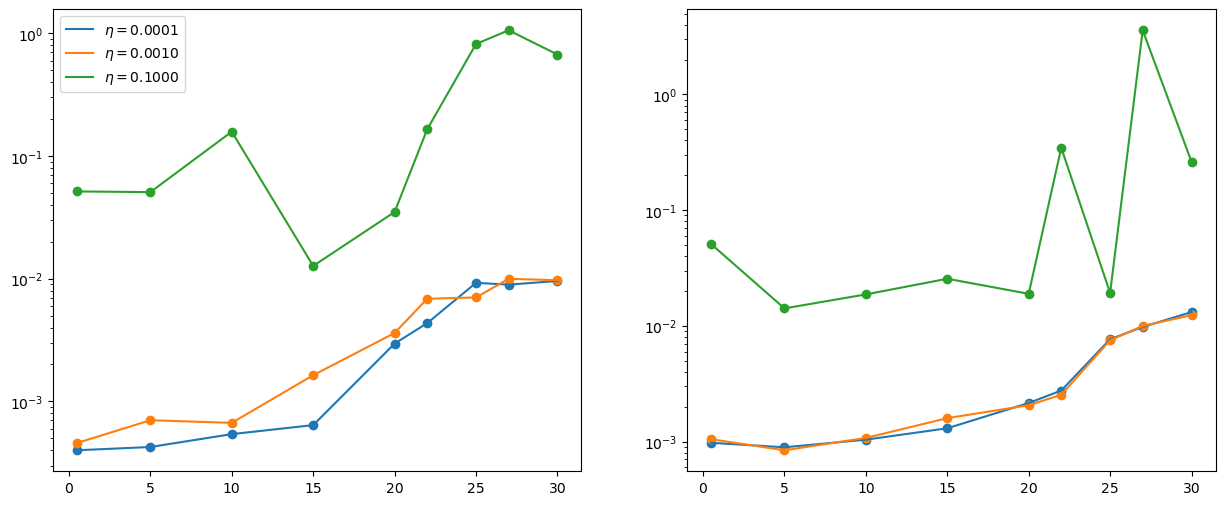

In [289]:
fig,ax = plt.subplots(1,2,figsize=[15,6])
ax[0].plot(sim_time[N_sample],rms_eta_sindy[0],label="$\eta = %2.4f$"%(Eta[0]))
ax[0].scatter(sim_time[N_sample],rms_eta_sindy[0])
ax[0].plot(sim_time[N_sample],rms_eta_sindy[1],label="$\eta = %2.4f$"%(Eta[1]))
ax[0].scatter(sim_time[N_sample],rms_eta_sindy[1])
ax[0].plot(sim_time[N_sample],rms_eta_sindy[2],label="$\eta = %2.4f$"%(Eta[2]))
ax[0].scatter(sim_time[N_sample],rms_eta_sindy[2])

#ax[0].plot(sim_time[N_sample],rms_eta_edmd[2])

ax[0].set_yscale("log")
ax[0].legend(loc="best")


ax[1].plot(sim_time[N_sample],rms_eta_edmd[0])
ax[1].scatter(sim_time[N_sample],rms_eta_edmd[0])
ax[1].plot(sim_time[N_sample],rms_eta_edmd[1])
ax[1].scatter(sim_time[N_sample],rms_eta_edmd[1])
ax[1].plot(sim_time[N_sample],rms_eta_edmd[2])
ax[1].scatter(sim_time[N_sample],rms_eta_edmd[2])
ax[1].set_yscale("log")


In [266]:
Eta = [0.001,0.1]

In [274]:
N_sample = [500,5000,10000,15000,20000,22000,25000,27000,30000]

In [275]:
rms_eta_sindy = []
rms_eta_edmd = []

for e in Eta:
    print(e)
    print(rms_eta_sindy)
    rms_sindy = []
    rms_edmd = []

    for n in N_sample:
        n = int(n)

        sim_time,sim_data,Coeff = rsindy.rossler_system_with_noise_gen(e,u0,T0,T,DT,P_order,threshold,rossler_params)
        sindy_sim_time,sindy_data=rsindy.sindy_rossler_trajectory(u0,Coeff,P_order,T0,T,DT)
        rms_sindy.append(mean_squared_error(sim_data[0:n],sindy_data[0:n],squared=False))

        tn,Un,UPn = redmd.generate_noisy_data(e,u0,T0,T,DT,rossler_params)
        ThetaRn, ThetaRdn = edmd.trial_function_eval(np.transpose(Un), np.transpose(UPn))
        An=edmd.findA(ThetaRn, ThetaRdn)

        edmd_time, edmd_data = redmd.edmd_rossler_trajectory(u0,An[0:3],T0,T,DT)
        rms_edmd.append(mean_squared_error(sim_data[0:n],edmd_data[0:n],squared=False))

    rms_eta_edmd.append(rms_edmd)
    rms_eta_sindy.append(rms_sindy)

0.001
[]
0.1
[[0.0004685028400453568, 0.00040768798088388437, 0.0005254661834461528, 0.0006742500053833382, 0.004314983099295436, 0.0036875484482916613, 0.010480194926563213, 0.011215436812819996, 0.010394871872330161]]


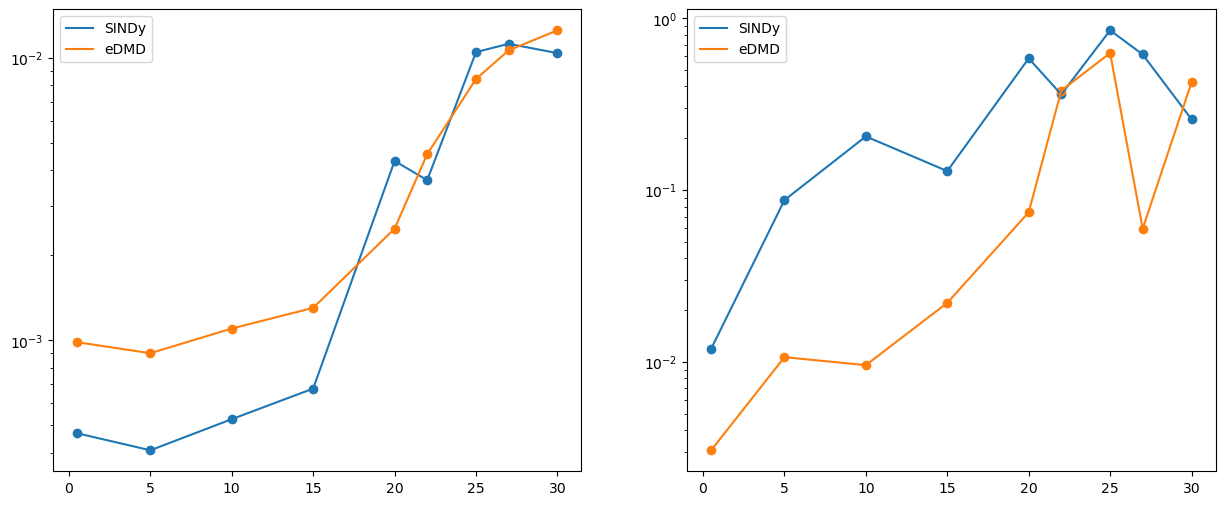

In [282]:
fig,ax = plt.subplots(1,2,figsize=[15,6])
ax[0].plot(sim_time[N_sample],rms_eta_sindy[0],label="SINDy")
ax[0].scatter(sim_time[N_sample],rms_eta_sindy[0])
ax[0].plot(sim_time[N_sample],rms_eta_edmd[0],label="eDMD")
ax[0].scatter(sim_time[N_sample],rms_eta_edmd[0])
ax[0].set_yscale("log")
ax[0].legend()

ax[1].plot(sim_time[N_sample],rms_eta_sindy[1],label="SINDy")
ax[1].scatter(sim_time[N_sample],rms_eta_sindy[1])
ax[1].plot(sim_time[N_sample],rms_eta_edmd[1],label="eDMD")
ax[1].scatter(sim_time[N_sample],rms_eta_edmd[1])
ax[1].set_yscale("log")
ax[1].legend()
